In [36]:
import torchvision
from torchvision import transforms
from __future__ import division
from __future__ import print_function

import argparse
import gzip
import os
import sys
import urllib

try:
    from urllib.error import URLError
    from urllib.request import urlretrieve
except ImportError:
    from urllib2 import URLError
    from urllib import urlretrieve
import torch
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
#import helper

%matplotlib inline

In [5]:
transform = transforms.Compose([transforms.Resize(32),
                                    transforms.CenterCrop(32),
                                    transforms.ToTensor()])

In [11]:

def report_download_progress(chunk_number, chunk_size, file_size):
    if file_size != -1:
        percent = min(1, (chunk_number * chunk_size) / file_size)
        bar = '#' * int(64 * percent)
        sys.stdout.write('\r0% |{:<64}| {}%'.format(bar, int(percent * 100)))


def download(destination_path, url, quiet):
    if os.path.exists(destination_path):
        if not quiet:
            print('{} already exists, skipping ...'.format(destination_path))
    else:
        print('Downloading {} ...'.format(url))
        try:
            hook = None if quiet else report_download_progress
            urlretrieve(url, destination_path, reporthook=hook)
        except URLError:
            raise RuntimeError('Error downloading resource!')
        finally:
            if not quiet:
                # Just a newline.
                print()


def unzip(zipped_path, quiet):
    unzipped_path = os.path.splitext(zipped_path)[0]
    if os.path.exists(unzipped_path):
        if not quiet:
            print('{} already exists, skipping ... '.format(unzipped_path))
        return
    with gzip.open(zipped_path, 'rb') as zipped_file:
        with open(unzipped_path, 'wb') as unzipped_file:
            unzipped_file.write(zipped_file.read())
            if not quiet:
                print('Unzipped {} ...'.format(zipped_path))

In [ ]:
# parser = argparse.ArgumentParser(
#         description='Download the CelebA dataset from the internet')
# parser.add_argument(
#         '-d', '--destination', default='.', help='Destination directory')
# parser.add_argument(
#         '-q',
#         '--quiet',
#         action='store_true',
#         help="Don't report about progress")
# options = parser.parse_args()
# options
if not os.path.exists('.'):
    os.makedirs('.')

try:
    path = os.path.join(os.getcwd(), 'celebA')
    url = 'https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip'
    download(path, url, 'quiet')
    !unzip {path}
except KeyboardInterrupt:
    print('Interrupted')

In [37]:
base_dir = 'processed_celeba_small/celeba/'
dataset= torchvision.datasets.ImageFolder(base_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=128,
                                         shuffle=True)

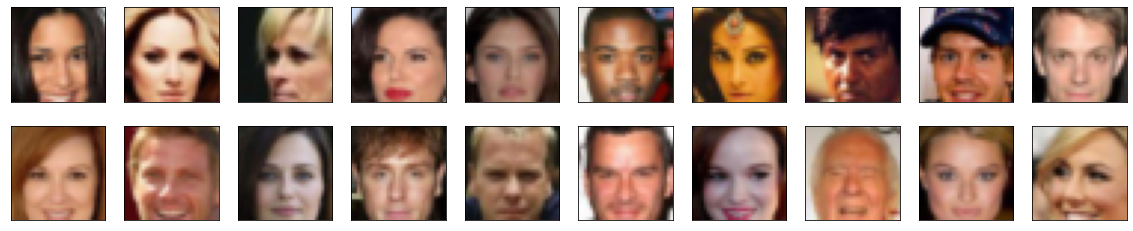

In [39]:
# helper display function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# obtain one batch of training images
dataiter = iter(dataloader)
images, _ = dataiter.next() # _ for no labels

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
